In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import uproot
import math
import csv

In [2]:
#partialTracks=np.load('partialTracks.npy')
#injectedTracks=np.load('injectedTracks.npy')

partialTracks=np.load('partialTrackTestsPositive.npy')
injectedTracks=np.load('injectedTrackTestsPositive.npy')

In [3]:
#Testing the minimizer. Adding tracks to partial Tracks
import random
testing = True

if(testing):
    #Gives a random number of partial tracks
    m=10#random.randrange(3,50)
    print(m)
    d=0
    for i in range(m):
        a=random.randrange(200)
        b=random.randrange(3)
        c=random.choice((1,3,5,13,15,17,19,21,23,25,27,29))
        partialTracks[1000+d]=[c,a]
        print(partialTracks[1000+d])
        partialTracks[1000+d+1]=[c+1,a+b]
        print(partialTracks[1000+d+1])
        d+=2
        print(d)


10
[17. 49.]
[18. 50.]
2
[  1. 172.]
[  2. 173.]
4
[  3. 126.]
[  4. 127.]
6
[  5. 150.]
[  6. 152.]
8
[ 29. 117.]
[ 30. 119.]
10
[13. 30.]
[14. 30.]
12
[ 3. 17.]
[ 4. 19.]
14
[  3. 150.]
[  4. 151.]
16
[ 13. 138.]
[ 14. 138.]
18
[ 13. 100.]
[ 14. 100.]
20


In [4]:
#Parameters based on geometery of the detector. 
geomData = np.genfromtxt("ericsBasicGeo.txt.txt", dtype=float)
np.reshape(geomData, (30,27))
print(geomData)

[[ 1.00000e+00  5.94582e+02  2.01000e+02  6.35000e-01  6.35000e-01
   1.59000e-01  1.01600e+02 -7.94000e-01 -5.82710e+01  6.36490e+01
   9.71457e-01  1.21920e+02  2.68900e+00 -5.15940e+01  5.00060e+01
   2.37214e-01  8.76108e-02 -5.12162e+01 -5.80060e+01  5.95013e+02
  -2.96627e+01  1.21478e+02  1.31015e-01  6.54514e-01 -3.58501e-03
  -4.97447e-03 -4.14671e-02]
 [ 2.00000e+00  5.95218e+02  2.01000e+02  6.35000e-01  6.35000e-01
  -1.59000e-01  1.01600e+02 -7.94000e-01 -5.82710e+01  6.36490e+01
   9.71457e-01  1.21920e+02  2.68900e+00 -5.15940e+01  5.00060e+01
   2.37214e-01  8.76108e-02 -5.15017e+01 -5.79936e+01  5.95651e+02
  -2.96627e+01  1.21478e+02  1.31015e-01  6.54514e-01 -3.58501e-03
  -4.97447e-03  2.11140e-03]
 [ 3.00000e+00  6.17274e+02  1.60000e+02  6.35000e-01  6.35000e-01
   1.59000e-01  1.01600e+02 -5.52000e-01 -5.82170e+01  6.37030e+01
   1.00000e+00  1.21920e+02  2.74300e+00 -5.13520e+01  5.02480e+01
  -5.44461e-04  6.57774e-02 -5.11073e+01 -5.81882e+01  6.16904e+02
   6

In [5]:
#remove zeros
partialTracks = partialTracks[~np.all(partialTracks == 0, axis=1)]


In [6]:
#number of hits
nSt1=0
for i in range(7):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i,axis=0))
    nSt1+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt1)
    
nSt2=0
for i in range(13,19):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i, axis=0))
    nSt2+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt2)
    
nSt3m=0
for i in range(19,25):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i, axis=0))
    nSt3m+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt3m)

nSt3p=0
for i in range(25,31):
    print("detectorId =", i)
    print("hits on detector", np.count_nonzero(partialTracks[:,0]==i, axis=0))
    nSt3p+=np.count_nonzero(partialTracks[:,0]==i,axis=0)
    print("total hits in station",nSt3p)
nHits=nSt1+nSt2+nSt3m+nSt3p  
print("Hits in total:",nSt1+nSt2+nSt3m+nSt3p)
    


detectorId = 0
hits on detector 0
total hits in station 0
detectorId = 1
hits on detector 4
total hits in station 4
detectorId = 2
hits on detector 3
total hits in station 7
detectorId = 3
hits on detector 5
total hits in station 12
detectorId = 4
hits on detector 5
total hits in station 17
detectorId = 5
hits on detector 3
total hits in station 20
detectorId = 6
hits on detector 3
total hits in station 23
detectorId = 13
hits on detector 4
total hits in station 4
detectorId = 14
hits on detector 4
total hits in station 8
detectorId = 15
hits on detector 1
total hits in station 9
detectorId = 16
hits on detector 1
total hits in station 10
detectorId = 17
hits on detector 3
total hits in station 13
detectorId = 18
hits on detector 2
total hits in station 15
detectorId = 19
hits on detector 0
total hits in station 0
detectorId = 20
hits on detector 0
total hits in station 0
detectorId = 21
hits on detector 0
total hits in station 0
detectorId = 22
hits on detector 0
total hits in station

In [7]:
#Determines hit pairs through the whole detector

hitPairX=np.zeros((2000,2))
det=1
index=0
indexD=0
for k in range(15):
    detLeft=np.where(partialTracks[:,0]==det)
    detRight=np.where(partialTracks[:,0]==det+1)

    for i in range(len(detLeft[0])):
        Xp=partialTracks[detLeft[0][i]][1]
        for j in range(len(detRight[0])):
            X=partialTracks[detRight[0][j]][1]
            elemDist=abs(Xp-X)
            if(elemDist<=1):
                print("Hit Pair Found", elemDist, Xp, X)
                hitPairX[index,0]=partialTracks[detLeft[0][i],0]
                hitPairX[index,1]=partialTracks[detLeft[0][i],1]
                hitPairX[index+1,0]=partialTracks[detRight[0][j],0]
                hitPairX[index+1,1]=partialTracks[detRight[0][j],1]
                print("Det Id:",partialTracks[detLeft[0][i],0],partialTracks[detRight[0][j],0])
                print("Elem Id:",partialTracks[detLeft[0][i],1],partialTracks[detRight[0][j],1])
                print("Elem Diff", elemDist)
                print("index",index)
                index+=2   

            else:
                print("Not a Hit pair:",elemDist,Xp)

    det+=2
    print(det)
#_+_+_+_+_+_+_+_+_+_+_+



Not a Hit pair: 11.0 94.0
Not a Hit pair: 27.0 94.0
Not a Hit pair: 79.0 94.0
Hit Pair Found 0.0 83.0 83.0
Det Id: 1.0 2.0
Elem Id: 83.0 83.0
Elem Diff 0.0
index 0
Not a Hit pair: 38.0 83.0
Not a Hit pair: 90.0 83.0
Not a Hit pair: 37.0 120.0
Hit Pair Found 1.0 120.0 121.0
Det Id: 1.0 2.0
Elem Id: 120.0 121.0
Elem Diff 1.0
index 2
Not a Hit pair: 53.0 120.0
Not a Hit pair: 89.0 172.0
Not a Hit pair: 51.0 172.0
Hit Pair Found 1.0 172.0 173.0
Det Id: 1.0 2.0
Elem Id: 172.0 173.0
Elem Diff 1.0
index 4
3
Hit Pair Found 1.0 71.0 72.0
Det Id: 3.0 4.0
Elem Id: 71.0 72.0
Elem Diff 1.0
index 6
Not a Hit pair: 36.0 71.0
Not a Hit pair: 56.0 71.0
Not a Hit pair: 52.0 71.0
Not a Hit pair: 80.0 71.0
Not a Hit pair: 34.0 106.0
Hit Pair Found 1.0 106.0 107.0
Det Id: 3.0 4.0
Elem Id: 106.0 107.0
Elem Diff 1.0
index 8
Not a Hit pair: 21.0 106.0
Not a Hit pair: 87.0 106.0
Not a Hit pair: 45.0 106.0
Not a Hit pair: 54.0 126.0
Not a Hit pair: 19.0 126.0
Hit Pair Found 1.0 126.0 127.0
Det Id: 3.0 4.0
Elem 

(0.0, 200.0)

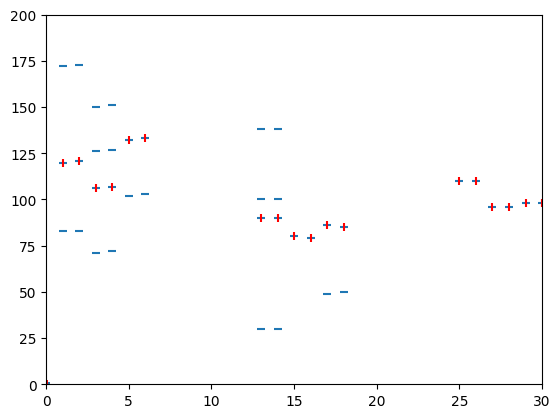

In [8]:
#plt.scatter(partialTracks[:,0],partialTracks[:,1],marker='_')
plt.scatter(hitPairX[:,0],hitPairX[:,1],marker='_')
plt.scatter(injectedTracks[:,0],injectedTracks[:,1],color='red',marker='|')
plt.xlim(0,30)
plt.ylim(0,200)

In [9]:
#math and values from paper

cosine=math.cos(.244)
sine=math.sin(.244)
tx=0.15
ty=0.1
delta=0.05
L=1.2192

In [10]:
#Station values

def Radius(Station):


    if(Station == 1):
        UID=5
        XID=3
        VID=1
    elif(Station == 2):
        UID=17
        XID=15
        VID=13
        V=14
    elif(Station == 3):
        UID=23
        XID=21
        VID=19
    elif(Station == 4):
        UID=29
        XID=27
        VID=25

    URadius=abs((geomData[UID][11]*sine/2))+tx*abs(geomData[UID][1]-geomData[XID][1])*cosine+ty*abs(geomData[UID][1]-geomData[XID][1])*sine+2*geomData[UID][4]+delta
    VRadius=tx*abs(geomData[UID][1]+geomData[VID][1]-2*geomData[XID][1])*cosine+ty*abs(geomData[UID][1]-geomData[VID][1])*sine+2*geomData[VID][4]
    print(URadius)
    print(VRadius)
    
    return(URadius,VRadius,VID,XID,UID)

In [43]:
#Setting what the planes are based off the station
print("This is the start of the loop")
s=4
URadius,VRadius,VID,XID,UID=Radius(s)
#Shows what station:
print("we are in Station:", s)
V=VID+1
X=V+2
U=V+4
#print(URadius,VRadius,VID,XID,UID,V,X,U)


This is the start of the loop
25.16236548220591
4.365109700386561
we are in Station: 4


In [44]:
print("-=-=-=--=-=-=U plane=-=-=-=-=-")

i=0
j=0
k=0

indexU=np.where(hitPairX[:,0]==U)
indexV=np.where(hitPairX[:,0]==V)
indexX=np.where(hitPairX[:,0]==X)

NumberX=np.count_nonzero(indexX)
NumberU=np.count_nonzero(indexU)
NumberV=np.count_nonzero(indexV)

if(NumberX!=1):
    XPosition=np.zeros(NumberX)
else:
    XPosition=np.zeros(1)
ucenter=np.zeros(NumberX)

for i in range(NumberX):
    XPosition[i]=(hitPairX[indexX[0],1][i]-(geomData[XID][2]+1)/2)*geomData[XID][4]+geomData[XID][5]+geomData[XID][7]*geomData[XID][10]+geomData[XID][12]*geomData[XID][4]+geomData[XID][26]
    #print(hitPairX[index[0],1][i])
    #print(XPosition[i])
    #for j in range(NumberU):
    ucenter[i]=abs(XPosition[i]*cosine)
    print(ucenter[i],XPosition[i])



-=-=-=--=-=-=U plane=-=-=-=-=-
83.71798503350162 -86.27345692040001


In [45]:
print("-=-=-=--=-=-=V plane=-=-=-=-=-")

i=0
j=0
k=0


if(NumberU!=1):
    UPosition=np.zeros(NumberU)
else:
    UPosition=np.zeros(1)
    
if(NumberV!=1):
    VPosition=np.zeros(NumberV)
else:
    VPosition=np.zeros(1)

vcenter=np.zeros(len(indexU[0]))


for i in range(NumberX):
    for j in range(NumberU):
        UPosition[j]=(hitPairX[indexU[0][j],1]-(geomData[UID][2]+1)/2)*(geomData[UID][4])+geomData[UID][5]+geomData[UID][7]*geomData[UID][10]+geomData[UID][12]*geomData[UID][4]+geomData[UID][26]
        vcenter[j]=abs(2*XPosition[i]*cosine)-UPosition[j]

        #print(UPosition[j])
        for k in range(NumberV):
            VPosition[k]=(hitPairX[indexV[0][k],1]-(geomData[VID][2]+1)/2)*(geomData[VID][4])+geomData[VID][5]+geomData[VID][7]*geomData[VID][10]+geomData[VID][12]*geomData[VID][4]+geomData[VID][26]
            print("VPosition",VPosition)
            print("VCenter",vcenter[j])

            

-=-=-=--=-=-=V plane=-=-=-=-=-
VPosition [-76.43290983]
VCenter 267.4020861088632


In [46]:
#cleaning up X plane
for i in range(NumberX):
    for j in range(NumberU):
        if(abs(UPosition[j])>ucenter[i]-URadius and abs(UPosition[j])<ucenter[i]+URadius):
            print(i)
           # print("hit confirmed in U", UPosition[j], "vs", ucenter[i]-URadius, "and", ucenter[i]+URadius)
            print("Confirmed", hitPairX[indexX[0][i]],hitPairX[indexX[0][i]-1])
            break
        else: 
            print("not confirmed")
            print(hitPairX[indexX[0][i]],
            hitPairX[indexX[0][i]-1])
            hitPairX[indexX[0][i]]=[0,0]
            hitPairX[indexX[0][i]-1]=[0,0]

0
Confirmed [28. 96.] [27. 96.]


In [47]:
i=0
j=0
print("-=-=-=-=-=-=-=-=--=-=Cleaning up U plane=-=-=-=-==-==-=-=-=-=-=-=-=-")
for i in range(NumberU):
    for j in range(len(ucenter)):
        if(abs(UPosition[i])>ucenter[j]-URadius and abs(UPosition[i])<ucenter[j]+URadius):

            print("hit confirmed in U", UPosition[i], "vs", ucenter[j]-URadius, "and", ucenter[j]+URadius)
            print("hit:" ,hitPairX[indexU[0][i]])
            break

        else:
            
            print("hit removed", hitPairX[indexU[0][i]])
            print("not a hit" , UPosition[i], "vs", ucenter[j]-URadius, "and", ucenter[j]+URadius)
           
            hitPairX[indexU[0][i]]=[0,0]
            hitPairX[indexU[0][i]-1]=[0,0]
            break





-=-=-=-=-=-=-=-=--=-=Cleaning up U plane=-=-=-=-==-==-=-=-=-=-=-=-=-
hit confirmed in U -99.96611604185999 vs 58.555619551295706 and 108.88035051570753
hit: [30. 98.]


In [48]:
#recalculate Planes:
print("Recalculating Xposition to get better V center and Position")
XPosition=np.zeros(NumberX)
#UPosition=np.zeros(NumberU)
VPosition=np.zeros(NumberV)

#ucenter=np.zeros(NumberU)
vcenter=np.zeros(NumberX*NumberU)
index=0

for i in range(NumberX):
    XPosition[i]=(hitPairX[indexX[0],1][i]-(geomData[XID][2]+1)/2)*geomData[XID][4]+geomData[XID][5]+geomData[XID][7]*geomData[XID][10]+geomData[XID][12]*geomData[XID][4]+geomData[XID][26]
    for j in range(NumberU):
        #UPosition[j]=(hitPairX[indexU[0][j],1]-(geomData[UID][2]+1)/2)*(geomData[UID][4])+geomData[UID][5]+geomData[UID][7]*geomData[UID][10]+geomData[UID][12]*geomData[UID][4]+geomData[UID][26]
        #ucenter[j]=abs(XPosition[i]*cosine)
        vcenter[index]=abs(2*XPosition[i]*cosine)-UPosition[j]
        print("vcenter",vcenter[index])
        index+=1
        break
           # print(UPosition[j])
for k in range(NumberV):
    VPosition[k]=(hitPairX[indexV[0][k],1]-(geomData[VID][2]+1)/2)*(geomData[VID][4])+geomData[VID][5]+geomData[VID][7]*geomData[VID][10]+geomData[VID][12]*geomData[VID][4]+geomData[VID][26]
    #print("VPosition",VPosition)


Recalculating Xposition to get better V center and Position
vcenter 267.4020861088632


In [49]:
i=0         
j=0
remove=0
print("-=-=-=-=-=-=-=-=-=-=-=-=-=Cleaning up V plane=-=-=-=-=-=-=-=-=-=-=-")
cleanup=np.zeros(NumberV)
for i in range(NumberV):
    for j in range(len(vcenter)):
        if(abs(VPosition[i])>vcenter[j]-VRadius and abs(VPosition[i])<vcenter[j]+VRadius):
            print("hit confirmed in V",VPosition[i], "vs", vcenter[j]-VRadius, "and", vcenter[j]+VRadius)
            print("hit:",hitPairX[indexV[0][i]])
            print("vcenter and indexj",vcenter[j],j)
            cleanup[i]=vcenter[j]
            break

           # if(VPosition[i]<0):
            #    print("hit removed in V",VPosition[i], "vs", vcenter[i]-VRadius, "and", vcenter[i]+VRadius)
            #hitPairX[indexV[0][i]]=[0,0]
            #hitPairX[indexV[0][i]-1]=[0,0]

        else:
            print("hit removed in V",VPosition[i], "vs", vcenter[j]-VRadius, "and", vcenter[j]+VRadius)
            print("hit:",hitPairX[indexV[0][i]])
            remove+=1
            print("indexJ",j,vcenter[j])

            if(NumberV-2==remove):
                print("error: Keeping at least one V hit.")
                break
            hitPairX[indexV[0][i]]=[0,0]
            hitPairX[indexV[0][i]-1]=[0,0]

            #break

-=-=-=-=-=-=-=-=-=-=-=-=-=Cleaning up V plane=-=-=-=-=-=-=-=-=-=-=-
hit removed in V -76.4329098286 vs 263.0369764084767 and 271.76719580924976
hit: [ 26. 110.]
indexJ 0 267.4020861088632


In [50]:
#Cleaning up X again and U again below



Clean=np.count_nonzero(cleanup)

vcenter=np.zeros(NumberX*NumberU)

index=0
skip=False

if(NumberX>4):
    print("Too many hits found in X plane. Recleaning being done.")
    for i in range(NumberX):
        XPosition[i]=(hitPairX[indexX[0],1][i]-(geomData[XID][2]+1)/2)*geomData[XID][4]+geomData[XID][5]+geomData[XID][7]*geomData[XID][10]+geomData[XID][12]*geomData[XID][4]+geomData[XID][26]
        for j in range(NumberU):
            if (NumberU>4):
                print("Also too many hits in U")
                UPosition[j]=(hitPairX[indexU[0][j],1]-(geomData[UID][2]+1)/2)*(geomData[UID][4])+geomData[UID][5]+geomData[UID][7]*geomData[UID][10]+geomData[UID][12]*geomData[UID][4]+geomData[UID][26]
                ucenter[j]=abs(XPosition[i]*cosine)
            vcenter[index]=abs(2*XPosition[i]*cosine)-UPosition[j]
            #print("vcenter",vcenter[index])
            for k in range(Clean):
                if(vcenter[index]==cleanup[k]):
                    print("kept", hitPairX[indexX[0]][i],hitPairX[indexU[0][j]])
                    skip=True
                    break
                    print("removed",hitPairX[indexX[0]][i],hitPairX[indexU[0][j]] )
                else:
                    hitPairX[indexX[0][i]]=[0,0]
                    hitPairX[indexX[0][i]-1]=[0,0]
            if(skip==True):
                break

            index+=1
    


In [51]:

i=0
j=0
if(NumberU>4):
    for i in range(NumberU):
        for j in range(len(ucenter)):
           # if(hitPairX[indexD[0][i],1]<=ucenter[i]+URadius and hitPairX[indexD[0][i],1]>=ucenter[i]-URadius):
            if(UPosition[i]>ucenter[j]-URadius and UPosition[i]<ucenter[j]+URadius):

                print("hit confirmed in U", UPosition[i], "vs", ucenter[j]-URadius, "and", ucenter[j]+URadius)
                print("hit:" ,hitPairX[indexU[0][i]])
                break

            else:

                print("hit removed", hitPairX[indexU[0][i]])
                print("not a hit" , UPosition[i], "vs", ucenter[j]-URadius, "and", ucenter[j]+URadius)

                hitPairX[indexU[0][i]]=[0,0]
                hitPairX[indexU[0][i]-1]=[0,0]
                break





[ 1. 83.]
[ 2. 83.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[ 3. 71.]
[ 4. 72.]
[  3. 106.]
[  4. 107.]


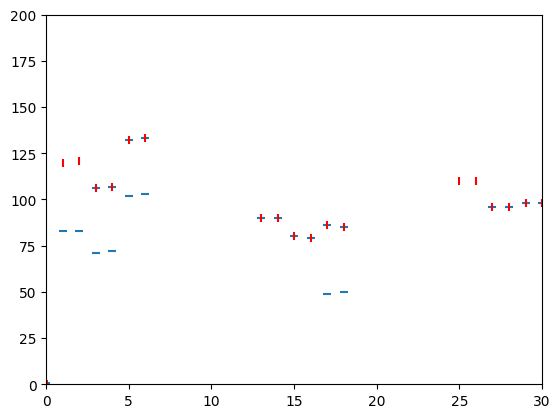

In [54]:
plt.scatter(hitPairX[:,0],hitPairX[:,1],marker='_')
plt.scatter(injectedTracks[:,0],injectedTracks[:,1],color='red',marker='|')
plt.xlim(0,30)
plt.ylim(0,200)
i=0
for i in range(10):
    print(hitPairX[i])